In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D



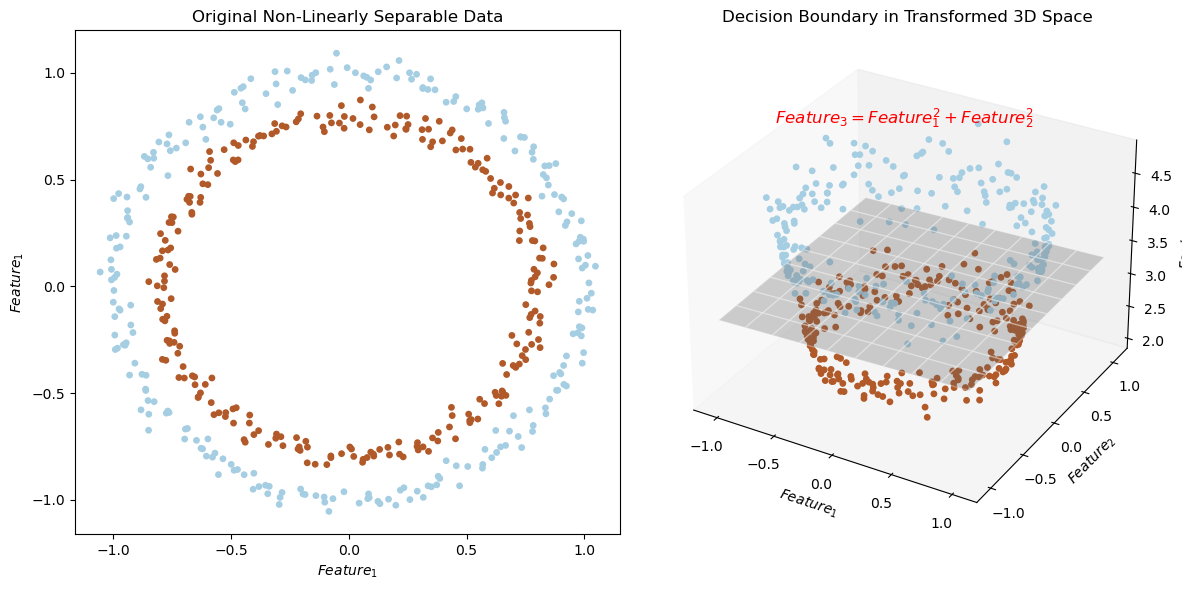

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

# Create a synthetic dataset with concentric circles (non-linearly separable)
X, y = make_circles(n_samples=500, noise=0.03, random_state=42)

# Apply a non-linear transformation to project the data into 3D space
X_transformed = np.column_stack((X[:, 0], X[:, 1], 4*X[:, 0]**2 + 4*X[:, 1]**2))

# Create a linear Support Vector Machine (SVM) model on the transformed data
svm_model = SVC(kernel='linear')
svm_model.fit(X_transformed, y)

# Plot the original data and the decision boundary in the transformed 3D space
fig = plt.figure(figsize=(12, 6))

# Plot the original data in 2D
ax1 = fig.add_subplot(121)
ax1.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=15)
ax1.set_title('Original Non-Linearly Separable Data')
ax1.set_xlabel('$Feature_1$')
ax1.set_ylabel('$Feature_1$')

# Plot the decision boundary in the transformed 3D space
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=y, cmap=plt.cm.Paired,s=15, depthshade=False)

# Create a meshgrid for decision boundary visualization
xx, yy = np.meshgrid(np.linspace(X_transformed[:, 0].min(), X_transformed[:, 0].max(), 10),
                     np.linspace(X_transformed[:, 1].min(), X_transformed[:, 1].max(), 10))
zz = (-svm_model.intercept_[0] - svm_model.coef_[0][0] * xx - svm_model.coef_[0][1] * yy) / svm_model.coef_[0][2]
ax2.plot_surface(xx, yy, zz, alpha=0.3, color='gray', antialiased=True, edgecolor='white')
ax2.set_title('Decision Boundary in Transformed 3D Space')
ax2.set_xlabel('$Feature_1$')
ax2.set_ylabel('$Feature_2$')
ax2.set_zlabel('$Feature_3$')

# Remove grid from the second plot
ax2.grid(False)

# Add the equation representing the transformed features
equation_text = r'$Feature_3 = Feature_1^2 + Feature_2^2$'
ax2.text(0.5*X_transformed[:, 0].max(), X_transformed[:, 1].min(), 1.4*X_transformed[:, 2].max(), equation_text, fontsize=12,
         ha='center', va='center', color='red')

plt.tight_layout()

fig.savefig('svm_nonlinear.png', dpi=300)
plt.show()




In [82]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

# Create a synthetic 1D dataset with two classes
X_1d, y_1d = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, random_state=42)

# Plot the original 1D data
plt.figure(figsize=(8, 4))
plt.scatter(X_1d, np.zeros_like(X_1d), c=y_1d, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Original 1D Data')
plt.xlabel('Feature 1')
plt.yticks([])
plt.show()

# Apply a non-linear transformation to project the 1D data into 2D space
X_transformed_2d = np.column_stack((X_1d, X_1d**2))

# Create a linear Support Vector Machine (SVM) model on the transformed 2D data
svm_model_2d = SVC(kernel='linear')
svm_model_2d.fit(X_transformed_2d, y_1d)

# Plot the transformed 2D data and the decision boundary in 2D space
fig = plt.figure(figsize=(12, 6))

# Plot the transformed 2D data
ax1 = fig.add_subplot(121)
ax1.scatter(X_transformed_2d[:, 0], X_transformed_2d[:, 1], c=y_1d, cmap=plt.cm.Paired, edgecolors='k')
ax1.set_title('Transformed 2D Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 1^2')

# Plot the decision boundary in the transformed 2D space
ax2 = fig.add_subplot(122)
ax2.scatter(X_1d, np.zeros_like(X_1d), c=y_1d, cmap=plt.cm.Paired, edgecolors='k')
xx_2d = np.linspace(X_1d.min(), X_1d.max(), 300)
yy_2d = xx_2d**2
ax2.plot(xx_2d, yy_2d, color='gray', linestyle='--', linewidth=2, label='Decision Boundary')
ax2.set_title('Decision Boundary in Transformed 2D Space')
ax2.set_xlabel('Feature 1')
ax2.set_yticks([])
ax2.legend()

plt.tight_layout()
plt.show()






ValueError: n_classes(2) * n_clusters_per_class(2) must be smaller or equal 2**n_informative(1)=2

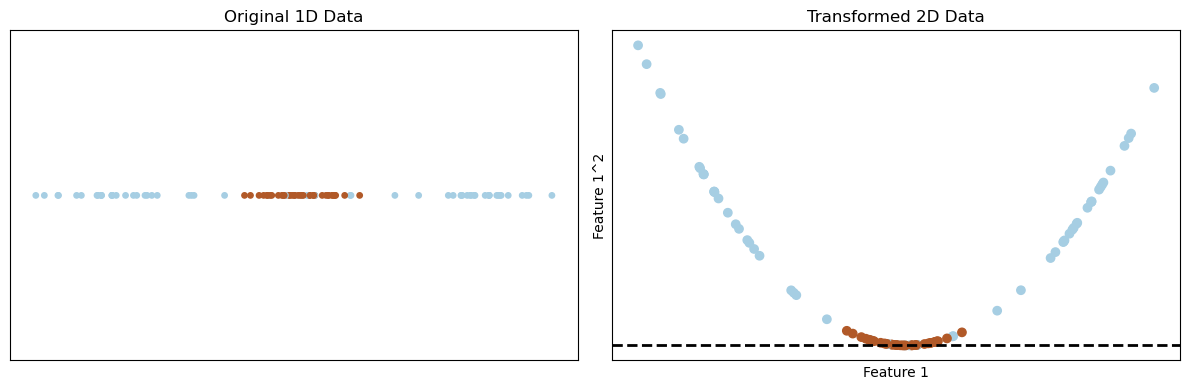

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Create a synthetic 1D dataset with three classes
np.random.seed(42)

# Generate 30 points for each class
X_class1 = np.random.normal(loc=-6, scale=1.5, size=(25, 1))
X_class2 = np.random.normal(loc=0, scale=1, size=(50, 1))
X_class3 = np.random.normal(loc=6, scale=1.5, size=(25, 1))

# Combine the three classes
X_1d = np.vstack([X_class1, X_class2, X_class3])
y_1d = np.concatenate([np.zeros(30), np.ones(40), 2 * np.zeros(30)])

# Shuffle the data
shuffle_idx = np.arange(len(y_1d))
np.random.shuffle(shuffle_idx)
X_1d = X_1d[shuffle_idx]
y_1d = y_1d[shuffle_idx]

# Plot the original 1D data with just points on the number line
plt.figure(figsize=(12, 4))

# Plot the original 1D data with points on the number line
plt.subplot(121)
plt.scatter(X_1d, np.zeros_like(X_1d), c=y_1d, cmap=plt.cm.Paired, s=15)
plt.title('Original 1D Data')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

# Apply a non-linear transformation to project the 1D data into 2D space
X_transformed_2d = np.column_stack((X_1d, X_1d**2))

# Create a linear Support Vector Machine (SVM) model on the transformed 2D data
svm_model_2d = SVC(kernel='linear')
svm_model_2d.fit(X_transformed_2d, y_1d)

# Plot the transformed 2D data and the decision boundary in 2D space
plt.subplot(122)
plt.scatter(X_transformed_2d[:, 0], X_transformed_2d[:, 1], c=y_1d, cmap=plt.cm.Paired)
plt.title('Transformed 2D Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 1^2')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

# Add a horizontal line at y=0
plt.axhline(y=0, color='k', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()
